# Model Training

In this notebook we try to train a LSTM with the gathered data from the simulation.

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
import re

import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
from keras.models import load_model

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## File Upload

In [3]:
emochat_train=pd.read_csv("/content/gdrive/MyDrive/data/split/emochat.train.csv")
emochat_test=pd.read_csv("/content/gdrive/MyDrive/data/split/emochat.test.csv")
facebook_train=pd.read_csv("/content/gdrive/MyDrive/data/split/facebook.train.csv")
facebook_test=pd.read_csv("/content/gdrive/MyDrive/data/split/facebook.test.csv")
friends_train=pd.read_csv("/content/gdrive/MyDrive/data/split/friends.train.csv")
friends_test=pd.read_csv("/content/gdrive/MyDrive/data/split/friends.test.csv")

PREPROCESSING

In [4]:
import pandas as pd
!pip install emoji
import emoji as emo
!pip install -U spacy
!python3 -m spacy download de_core_news_sm
import spacy
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from nltk.stem.snowball import GermanStemmer
from wordcloud import WordCloud,STOPWORDS
from google.colab import drive
from keras.models import load_model

     |████████████████████████████████| 194kB 6.1MB/s 
  Created wheel for emoji: filename=emoji-1.4.0-cp37-none-any.whl size=186501 sha256=3fee4e7c481d55e418e10a67b53a7293cb32c5255288975e334ca6fc33f92cbe
  Stored in directory: /root/.cache/pip/wheels/31/c2/7e/a1649e4a71d6967ba58a76db3d3f23b6e94c82391ffa1f531c
Successfully built emoji
     |████████████████████████████████| 6.4MB 5.0MB/s 
     |████████████████████████████████| 10.1MB 34.2MB/s 
     |████████████████████████████████| 460kB 22.5MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 624kB 28.4MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installa

In [5]:
# Tokenization, stop words removal, stemming and removal of empty strings

sp = spacy.load('de_core_news_sm')
all_stopwords = ['zehntes', 'dein', 'derselben', 'habe', 'das', 'zwar', 'wahr', 'wie', 'kannst', 'drittes', 'aber', 'konnte', 'hätten', 'will', 'andern', 'oder', 'währenddessen', 'seine', 'hin', 'wollten', 'daß', 'fünften', 'sagt', 'geschweige', 'mancher', 'darum', 'vielen', 'solang', 'jedermann', 'demgemäss', 'jeder', 'jede', 'haben', 'viele', 'vom', 'besser', 'jahr', 'können', 'jemand', 'währenddem', 'siebentes', 'dementsprechend', 'könnt', 'allein', 'musst', 'darüber', 'achte', 'vergangene', 'zugleich', 'durfte', 'hoch', 'mehr', 'außerdem', 'dürfen', 'aus', 'ihr', 'solcher', 'keinem', 'vergangenen', 'weiteren', 'nichts', 'früher', 'nach', 'seiner', 'erster', 'erstes', 'trotzdem', 'weitere', 'kleine', 'demselben', 'so', 'darunter', 'es', 'meinem', 'besonders', 'solchen', 'zehnter', 'grossen', 'meinen', 'welche', 'mögen', 'schlecht', 'wegen', 'wenig', 'unsere', 'zeit', 'damals', 'dermassen', 'natürlich', 'neunter', 'genug', 'erste', 'gemocht', 'neuen', 'denen', 'kommt', 'kann', 'kein', 'neuntes', 'warum', 'musste', 'gern', 'wirst', 'alle', 'machte', 'dazu', 'ging', 'gutes', 'machen', 'ach', 'diejenige', 'ganze', 'dieses', 'mein', 'na', 'neunten', 'dritter', 'bereits', 'sechster', 'allen', 'ihnen', 'dazwischen', 'einiger', 'über', 'en', 'mich', 'von', 'werden', 'kaum', 'ihrem', 'dagegen', 'nie', 'ausserdem', 'neue', 'ob', 'sein', 'tat', 'anderen', 'deine', 'danach', 'groß', 'jedoch', 'wurden', 'seinem', 'zweiten', 'durch', 'achter', 'einen', 'deswegen', 'damit', 'rechte', 'möchte', 'daran', 'keiner', 'magst', 'auch', 'vielem', 'derjenigen', 'anders', 'kurz', 'dort', 'sondern', 'um', 'ins', 'neun', 'dasein', 'meines', 'großer', 'wird', 'tag', 'einmaleins', 'sei', 'zehnten', 'tage', 'ihren', 'als', 'davor', 'acht', 'große', 'eigener', 'geworden', 'siebente', 'denselben', 'allgemeinen', 'dritten', 'meine', 'wann', 'gar', 'vielleicht', 'gut', 'hat', 'demgegenüber', 'mag', 'eines', 'weniger', 'zunächst', 'statt', 'anderem', 'könnte', 'dafür', 'beide', 'keinen', 'jeden', 'infolgedessen', 'niemandem', 'leicht', 'jenes', 'gerade', 'grosser', 'irgend', 'jahre', 'dieser', 'wo', 'jene', 'willst', 'ehrlich', 'allerdings', 'jedermanns', 'waren', 'seid', 'deiner', 'ab', 'jedem', 'sechs', 'vier', 'hätte', 'während', 'bisher', 'ganzes', 'manche', 'kommen', 'muß', 'diesem', 'dieselben', 'demzufolge', 'ganzer', 'niemanden', 'bist', 'rechter', 'denn', 'tagen', 'wessen', 'immer', 'dahin', 'habt', 'siebtes', 'im', 'dieselbe', 'niemand', 'sehr', 'desselben', 'offen', 'solches', 'bei', 'wenn', 'elf', 'diejenigen', 'einige', 'sollen', 'wollte', 'weniges', 'dasselbe', 'wollen', 'siebter', 'du', 'seines', 'des', 'dies', 'weil', 'seien', 'besten', 'und', 'mochten', 'vierte', 'eigenen', 'á', 'jahren', 'mit', 'erst', 'zuerst', 'euch', 'dahinter', 'zu', 'auf', 'an', 'seit', 'wir', 'bin', 'gibt', 'sah', 'man', 'darfst', 'dabei', 'ebenso', 'ihn', 'wieder', 'sich', 'andere', 'werde', 'würden', 'jenem', 'hatte', 'sechsten', 'solchem', 'sagte', 'derjenige', 'gross', 'großes', 'seinen', 'einmal', 'richtig', 'ersten', 'etwa', 'unserer', 'weiter', 'den', 'war', 'worden', 'vierten', 'zusammen', 'geht', 'doch', 'manchen', 'gemacht', 'hast', 'gehen', 'satt', 'oben', 'dadurch', 'macht', 'ohne', 'wer', 'leider', 'her', 'wenigstens', 'hinter', 'je', 'vor', 'für', 'alles', 'eine', 'drin', 'demgemäß', 'sechste', 'zwischen', 'was', 'diese', 'sind', 'wohl', 'zur', 'dem', 'ja', 'nun', 'viel', 'dessen', 'rund', 'meiner', 'ganzen', 'nachdem', 'noch', 'soll', 'tel', 'wirklich', 'dank', 'sie', 'uns', 'welchen', 'deinem', 'wenige', 'fünfte', 'deshalb', 'weiteres', 'dritte', 'drei', 'gedurft', 'siebenten', 'gekannt', 'am', 'manchem', 'der', 'deren', 'hatten', 'kleinen', 'kleines', 'beispiel', 'kleiner', 'jemandem', 'lange', 'er', 'wen', 'mir', 'eigene', 'sieben', 'gewollt', 'also', 'großen', 'bald', 'endlich', 'möglich', 'gekonnt', 'in', 'mittel', 'solche', 'bekannt', 'später', 'grosses', 'nur', 'neunte', 'ein', 'übrigens', 'zwei', 'keine', 'muss', 'einiges', 'schon', 'eigen', 'welchem', 'nahm', 'heißt', 'ganz', 'los', 'nein', 'eigenes', 'manches', 'oft', 'heute', 'siebenter', 'zweiter', 'darauf', 'jenen', 'allem', 'dass', 'sechstes', 'durften', 'siebten', 'wäre', 'daher', 'gemusst', 'derselbe', 'wart', 'mussten', 'jemanden', 'teil', 'einander', 'selbst', 'würde', 'einigen', 'jener', 'recht', 'viertes', 'zwanzig', 'guter', 'mögt', 'uhr', 'a', 'die', 'zurück', 'rechtes', 'aller', 'dich', 'fünf', 'jetzt', 'lieber', 'dermaßen', 'sollten', 'weit', 'wollt', 'diesen', 'grosse', 'daselbst', 'ihrer', 'unter', 'etwas', 'gab', 'ist', 'morgen', 'sowie', 'überhaupt', 'sollte', 'achten', 'dann', 'einer', 'dürft', 'zehnte', 'gute', 'neben', 'gesagt', 'beim', 'welches', 'unser', 'außer', 'gegenüber', 'seitdem', 'werdet', 'müsst', 'zweite', 'fünftes', 'ausser', 'bis', 'da', 'daraus', 'indem', 'ich', 'müssen', 'fünfter', 'heisst', 'gehabt', 'einem', 'siebte', 'mochte', 'gleich', 'darf', 'ihm', 'ende', 'ihres', 'achtes', 'sonst', 'davon', 'daneben', 'wem', 'ag', 'zehn', 'wurde', 'zweites', 'entweder', 'nicht', 'eben', 'hier', 'ihre', 'gewesen', 'gegen', 'konnten', 'vierter', 'welcher', 'darin', 'beiden', 'durchaus', 'lang', 'rechten', 'zum', 'kam', 'dir', 'tun']
stemmer = GermanStemmer()


def get_tokens(body):
  body_tokens = sp.tokenizer(body)
  string_tokens = []
  for word in body_tokens:
      if not (str(word) in all_stopwords or str(word) in ('',' ')):
        #stemmer.stem(str(word))
        string_tokens.append(str(word))
  return string_tokens

def transpose_emotion(df):
  one_hot = pd.get_dummies(df['emotion'])
  # Drop column B as it is now encoded
  df = df.drop('emotion',axis = 1)
  # Join the encoded df
  df = df.join(one_hot)
  return df

def contexify(df,dialogue_column,n_window,duplicates=False):
  #emotions=['joy','sadness']
  #emotions = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'anticipation', 'anger', 'disgust']
  emotions = ['joy', 'fear', 'surprise', 'sadness', 'anger', 'disgust']
  dialogues = []
  for i in df[dialogue_column].unique():
      dialogue = df[df['did']==i] 
      #only keep last emoji as label
      if duplicates:
        dialogue=dialogue.drop_duplicates(subset=['timestamp','utterance'], keep='last')
      new_df = pd.concat([dialogue.shift(i) for i in range(n_window)], axis=1)
      x = list(new_df.columns)
      new_df.columns = [v +"-"+ str(x[:i].count(v) + 1) if x.count(v) > 1 else v for i, v in enumerate(x)]
      utterances = [x for x in new_df.columns if x.startswith('utterance')]
      new_df = new_df[utterances + ['emotion-1']]
      dialogues.append(new_df)
  all_df=pd.concat(dialogues)
  all_df = all_df.rename(columns={'emotion-1': 'emotion'})
  #all_df = all_df.replace({'emotion': {'anticipation': 'others', 'trust': 'others', 'surprise':'others','neutral':'others','anger':'anger','fear':'fear','disgust':'others' }})
  #all_df = all_df.replace({'emotion': {'anticipation': 'aggresiveness', 'trust': 'love', 'surprise':'awe','neutral':'others','anger':'aggresiveness','fear':'awe','disgust':'remorse','joy':'love','sadness':'remorse' }})
  all_df = all_df.replace(np.nan, '', regex=True)
  all_df = all_df[all_df['emotion'].isin(emotions)]
  return all_df

def tokenize_utterances(df):
    utt_col_names=[col for col in df.columns if col.startswith('utterance')]
    tokenized = [df[utterances].apply(get_tokens) for utterances in utt_col_names]
    first= 0
    for c,series in enumerate(tokenized):
      if c == 0:
        first = series
      else:
        first= first + series
        if c == (len(tokenized)-1):
          break
    df['context']=first
    df = df.drop(utt_col_names, axis=1)
    return df

def lowercase_remove_white_space(df):
  df['utterance'] = df['utterance'].str.strip()
  df['utterance'] = df['utterance'].apply(lambda x:x.lower())
  return df


def tokenize_transpose(dfs):
    dfs_output=[]
    for df in dfs:
      cleaned = lowercase_remove_white_space(df)
      contexed=contexify(cleaned,'did',4)
      df = transpose_emotion(tokenize_utterances(contexed))
      dfs_output.append(df)
    return pd.concat(dfs_output)

  
      
      



In [6]:
train_data=[emochat_train,facebook_train,friends_train]
test_data=[emochat_test,facebook_test,friends_test]
train_tokenized=tokenize_transpose(train_data)
test_tokenized=tokenize_transpose(test_data)

Load Glove embeddings

In [7]:
embeddings_index = {}
glove_file = "/content/gdrive/My Drive/Sentiment/vectors.txt" 
with open(glove_file) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

Found 1309281 word vectors.


In [8]:
def token_again(df):
  word_tokens = np.append(df["context"].values, list(embeddings_index.keys()))
  print(len(word_tokens))

  # The maximum number of words to be used. (most frequent)
  MAX_NB_WORDS = 50000
  # Max number of words in each complaint.
  MAX_SEQUENCE_LENGTH = 250
  # This is fixed.
  EMBEDDING_DIM = 100

  #Tokenization of the words
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ', oov_token='<unw>', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\'')

  tokenizer.fit_on_texts(df['context'].values)
  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  # this takes our sentences and replaces each word with an integer
  X = tokenizer.texts_to_sequences(df['context'].values)
  # we then pad the sequences so they're all the same length (sequence_length)
  X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  print('Shape of data tensor:', X.shape)
  #Slicing labels to vectors
  Y = df[['joy', 'fear', 'surprise', 'sadness', 'disgust', 'anger']]
  print('Shape of label tensor:', Y.shape)

  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  return X,Y,word_index


## Train-Test-Split

In [9]:
X_train,Y_train,word_index_train= token_again(train_tokenized)
X_test,Y_test,word_index_test= token_again(test_tokenized)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

1319385
Found 10473 unique tokens.
Shape of data tensor: (10104, 250)
Shape of label tensor: (10104, 6)
Found 10473 unique tokens.
1310552
Found 2337 unique tokens.
Shape of data tensor: (1271, 250)
Shape of label tensor: (1271, 6)
Found 2337 unique tokens.
(10104, 250) (10104, 6)
(1271, 250) (1271, 6)


## GloVe

In [10]:
MAX_NB_WORDS = 50000
word_index=word_index_train
num_words = min(MAX_NB_WORDS, len(word_index)) + 1
print(num_words)

embedding_dim = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

10474


## Model Training

In [11]:
model = Sequential() 
#model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])) 
model.add(Embedding(num_words, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=X_train.shape[1], trainable=False)) 
#Dropout L 
model.add(SpatialDropout1D(0.5)) 
#LSTM (not pretrained yet) 
model.add(Bidirectional(LSTM(224, dropout=0.5, recurrent_dropout=0.2))) 
#Dense with 6 outputs, because we have 6 different emotions as labels 
model.add(Dense(6, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model.summary()) 
epochs = 20 
batch_size = 64 

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 300)          3142200   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 300)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 448)               940800    
_________________________________________________________________
dense (Dense)                (None, 6)                 2694      
Total params: 4,085,694
Trainable params: 943,494
Non-trainable params: 3,142,200
_________________________________________________________________
None
Epoch 1/20
143/143 [==============================] - 847s 6s/step - loss: 0.4587 - accuracy: 0.3413 - val_loss: 0.4165 - val_accuracy: 0.3185
Epoch 2/20
143/143 [==============================] - 816s 6s/step - loss: 0.4046 - accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


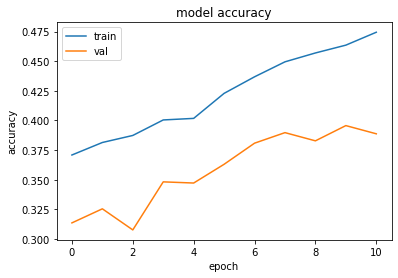

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

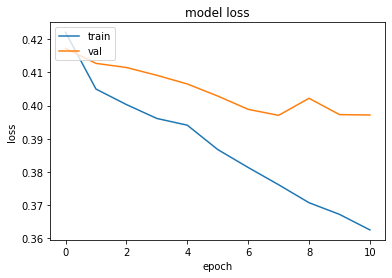

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [12]:
## TODO
#model = load_model('/content/gdrive/My Drive/models/model.h5')
y_hat = model.predict(X_test)
y_hat

array([[0.15872613, 0.17448252, 0.10377285, 0.31255722, 0.07205418,
        0.16435516],
       [0.14202961, 0.2008903 , 0.09494862, 0.30495206, 0.08730102,
        0.18013418],
       [0.1443032 , 0.23443818, 0.09552452, 0.28789046, 0.09485513,
        0.15316316],
       ...,
       [0.3348564 , 0.07916218, 0.06215715, 0.32094908, 0.05360922,
        0.19849545],
       [0.4273774 , 0.07797548, 0.11007521, 0.1177817 , 0.0857825 ,
        0.1714254 ],
       [0.20738825, 0.09230363, 0.3306294 , 0.06020108, 0.05094999,
        0.25291368]], dtype=float32)

In [13]:
Y_test

,joy,fear,surprise,sadness,disgust,anger
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,1,0,0
5,0,0,0,1,0,0
...,...,...,...,...,...,...
1100,1,0,0,0,0,0
1101,1,0,0,0,0,0
1102,1,0,0,0,0,0
1105,0,0,1,0,0,0


In [14]:
res=list(map(lambda x: np.argmax(x), Y_test.values))

In [15]:
pred = list(map(lambda x: np.argmax(x), y_hat))

In [16]:
accuracy_score(res, pred)

0.3627065302911094

precision: [0.47863248 0.21052632 0.39877301 0.20577617 0.         0.24336283]
recall: [0.55009823 0.04301075 0.30516432 0.28358209 0.         0.29891304]
fscore: [0.511883   0.07142857 0.34574468 0.23849372 0.         0.26829268]
support: [509  93 213 201  71 184]
accuracy: 0.3627065302911094


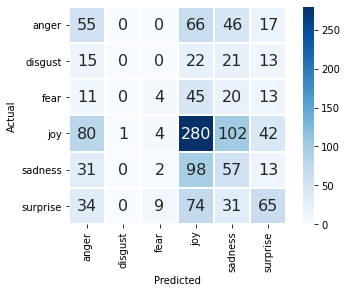

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
label_list=res
pred_list=pred
precision, recall, fscore, support = score(label_list, pred_list)
acc=accuracy_score(label_list, pred_list)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(acc))
index_to_emotion = {0: 'joy', 1: 'fear', 2: 'surprise', 3: 'sadness', 4: 'disgust', 5: 'anger'}
cf_matrix = confusion_matrix(label_list, pred_list)
names = [index_to_emotion[x] for x in np.unique(label_list)]
df_cm = pd.DataFrame(cf_matrix, columns=names, index = names)
df_cm = df_cm.reindex(sorted(df_cm.columns), axis=1)
# sort by index labels
df_cm = df_cm.sort_index(axis = 0)

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt = 'g', square=2, linewidth=1.)
plt.show()

In [ ]:
conf = confusion_matrix(res, pred)
conf

array([[509,   0,   0,   0,   0,   0],
       [ 93,   0,   0,   0,   0,   0],
       [213,   0,   0,   0,   0,   0],
       [201,   0,   0,   0,   0,   0],
       [ 71,   0,   0,   0,   0,   0],
       [184,   0,   0,   0,   0,   0]])

#### Multiple values with argwhere

In [ ]:
l = list(map(lambda x: np.array([[np.argmax(x)]]) if not np.any(np.argwhere(x > 0.5)) else np.argwhere(x > 0.5), y_hat))
print(l[8])

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
np_hat = Y_test.to_numpy()
l = list(map(lambda x: np.argwhere(x == np.amax(x)), np_hat))
print(l[8])

[[0]]


In [ ]:
accuracy_score([np.argmax(Y_test.T[column]) for column in Y_test.T], list(map(lambda x: np.argwhere(x == np.amax(x)), y_hat)))

ValueError: ignored

In [ ]:
pd.DataFrame(data=y_hat)

#### Predict on text on single message

In [ ]:
prediction = tokenizer.texts_to_sequences(["Die haben schon wieder verloren"])
prediction_index = tokenizer.word_index
prediction = pad_sequences(prediction, maxlen=MAX_SEQUENCE_LENGTH)
print(prediction)

In [ ]:
result = model.predict(prediction)
result

In [ ]:
np.argmax(result) 

In [ ]:
print(tokenizer)

In [ ]:
import json
with open('/content/gdrive/My Drive/models/vocab.json', 'w') as f:
    json.dump(tokenizer.word_index, f)

In [ ]:
tokenizer.word_index

### Save model

In [ ]:
model.save('/content/gdrive/My Drive/models/model_merged.h5')

In [ ]:
import time
t = time.time()

export_path_keras = "/content/gdrive/My Drive/models/model_6_{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)